In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import datetime as dt
import statsmodels.api as sm
%matplotlib inline

In [2]:
df1=pd.read_excel(r"C:\Users\ANKITHA\Downloads\data.csv.xlsx")
df1.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [3]:
print(f"No. of Records:{df1.shape[0]}")
print(f"No. of feature:{df1.shape[1]}")
print('*'*20)
df1.info()

No. of Records:3998
No. of feature:39
********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12p

In [4]:
df1.shape

(3998, 39)

In [5]:
#dropping unncessary columns
df1 = df1.drop(columns = ['Unnamed: 0', 'ID','CollegeID','CollegeCityID'])

In [6]:
df1.columns

Index(['Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityTier', 'CollegeState', 'GraduationYear', 'English',
       'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [7]:
for i in df1.columns:
    print('='*30,i,'='*30)
    print(df1[i].unique())

============================== Salary ==============================
[ 420000  500000  325000 1100000  200000  300000  400000  600000  230000
  450000  270000  350000  250000  120000  320000  190000  180000  335000
  435000  345000  145000  220000  530000  340000  360000  215000   80000
  330000  380000  110000  205000   95000  390000   60000  240000  525000
  305000  150000  310000  455000  800000  100000  280000  445000  315000
  370000  275000 1500000  425000  470000  460000  510000  480000  170000
  640000  225000  440000 1200000  675000  105000  195000  385000  235000
  615000  290000  140000  405000 1860000  375000  430000  660000   70000
  410000  550000   35000  115000  415000  265000  285000  245000  395000
  560000  700000  185000  160000  625000   85000  135000  785000  210000
  155000  355000  535000  690000  260000 1110000 1000000  505000  475000
  715000  820000   90000  720000 2600000  515000   55000  495000   65000
  655000  545000  520000  645000 1025000  775000  49000

In [8]:
df1["DOL"]=df1["DOL"].replace("present",dt.datetime.today())
df1['DOL'] = pd.to_datetime(df1['DOL'])
df1['DOJ'] = pd.to_datetime(df1['DOJ'])
df1.head()


,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,2024-02-23 15:17:18.029159,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,2024-02-23 15:17:18.029159,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,2024-02-23 15:17:18.029159,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,2024-02-23 15:17:18.029159,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01 00:00:00.000000,get,Manesar,m,1991-02-27,78.0,cbse,2008,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [9]:
# changing the gender column with proper phrase
df1['Gender'].replace({'f':'Female','m':'Male'}, inplace = True)
df1.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,2024-02-23 15:17:18.029159,senior quality engineer,Bangalore,Female,1990-02-19,84.3,"board ofsecondary education,ap",2007,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,2024-02-23 15:17:18.029159,assistant manager,Indore,Male,1989-10-04,85.4,cbse,2007,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,2024-02-23 15:17:18.029159,systems engineer,Chennai,Female,1992-08-03,85.0,cbse,2010,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,2024-02-23 15:17:18.029159,senior software engineer,Gurgaon,Male,1989-12-05,85.6,cbse,2007,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01 00:00:00.000000,get,Manesar,Male,1991-02-27,78.0,cbse,2008,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [10]:
print((df1['10percentage'] <=10).sum())
print((df1['12percentage'] <=10).sum())
print((df1['collegeGPA'] <=10).sum())


0
0
12


In [11]:
# collegeGPA columns has some has -1 and 0 values, imputing values
df1.loc[df1['collegeGPA']<=10,'collegeGPA'] = (df1.loc[df1['collegeGPA']<=10,'collegeGPA']/10)*100
df1.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,2024-02-23 15:17:18.029159,senior quality engineer,Bangalore,Female,1990-02-19,84.3,"board ofsecondary education,ap",2007,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,2024-02-23 15:17:18.029159,assistant manager,Indore,Male,1989-10-04,85.4,cbse,2007,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,2024-02-23 15:17:18.029159,systems engineer,Chennai,Female,1992-08-03,85.0,cbse,2010,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,2024-02-23 15:17:18.029159,senior software engineer,Gurgaon,Male,1989-12-05,85.6,cbse,2007,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01 00:00:00.000000,get,Manesar,Male,1991-02-27,78.0,cbse,2008,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [12]:
print((df1==0).sum()[(df1==0).sum() > 0])

10board             350
12board             359
CollegeCityTier    2797
GraduationYear        1
dtype: int64


In [13]:
(df1==-1).sum()[(df1==-1).sum()>0]/len(df1)*100

JobCity                  11.530765
Domain                    6.153077
ComputerProgramming      21.710855
ElectronicsAndSemicon    71.385693
ComputerScience          77.438719
MechanicalEngg           94.122061
ElectricalEngg           95.972986
TelecomEngg              90.645323
CivilEngg                98.949475
dtype: float64

The following columns describes subjects which are optional for the exam and that is why they have large number of -1(null values). Hence we will be dropping the columns out of analysis in which the percentage for -1 values is greater than or equal to 80% and for the rest of them, we will impute the values as zero.

In [14]:
cols=['10board','12board','CollegeTier','MechanicalEngg', 'ElectricalEngg', 'TelecomEngg','CivilEngg','ComputerScience']
df1 = df1.drop(columns =cols)

# Keeping top 30 Desingations and rest are others

In [15]:
for Designation in df1['Designation'].unique():
    min_count = df1['Designation'].value_counts()[:30].min()
    if df1[df1['Designation'] == Designation]["Designation"].value_counts()[0] < min_count:
        df1.loc[df1['Designation'] == Designation, 'Designation'] = 'other'

In [16]:
mech_des=df1[df1["Specialization"].isin(["mechanical engineering","mechanical and automation"])]["Designation"].mode()[0]
df1["Designation"].replace("get",mech_des,inplace=True)

eee_des=df1[df1["Specialization"]=="electronics and electrical engineering"]["Designation"].mode()[0]
df1["Designation"].replace("get",eee_des,inplace=True)


In [17]:
df1["JobCity"]=df1["JobCity"].str.strip()
df1["JobCity"]=df1["JobCity"].str.title()
# replace the city names with proper proper names
df1["JobCity"]=df1["JobCity"].str.replace('Navi Mumbai','Mumbai').replace('Chennai & Mumbai','Mumbai')

df1["JobCity"]=df1["JobCity"].str.replace('Greater Noida','Noida').replace('Nouda',"Noida").replace('A-64,Sec-64,Noida',"Noida")

df1["JobCity"]=df1["JobCity"].str.replace('Bhubaneswar','Bhubaneshwar').replace('Bhubneshwar','Bhubaneshwar')

df1["JobCity"]=df1["JobCity"].str.replace('Trivandrum','Thiruvananthapuram').replace('Technopark, Trivandrum','Thiruvananthapuram')

df1["JobCity"]=df1["JobCity"].str.replace('Vsakhapttnam','Visakhapatnam').replace('Vizag','Visakhapatnam')

df1["JobCity"]=df1["JobCity"].str.replace('New Delhi - Jaisalmer','New Delhi').replace('Delhi','New Delhi').replace('Delhi/Ncr','New Delhi').replace('New Dehli','New Delhi')

df1["JobCity"]=df1["JobCity"].str.replace('Kochi/Cochin','Kochi').replace('Kochi/Cochin, Chennai And Coimbatore','Kochi')

df1["JobCity"]=df1["JobCity"].str.replace('Gurgoan','Gurgaon').replace('Guragaon','Gurgaon')

df1["JobCity"]=df1["JobCity"].str.replace('Calicut','Kolkata')

df1["JobCity"]=df1["JobCity"].str.replace('Gandhinagar','Gandhi Nagar')


df1["JobCity"]=df1["JobCity"].str.replace('Indirapuram, Ghaziabad',"Ghaziabad").replace('Gaziabaad',"Ghaziabad").replace('Gajiabaad',"Ghaziabad")


df1["JobCity"]=df1["JobCity"].str.replace('Kudankulam ,Tarapur',"Tarapur")

df1["JobCity"]=df1["JobCity"].str.replace('Sadulpur,Rajgarh,Distt-Churu,Rajasthan','Sadulpur')
df1["JobCity"]=df1["JobCity"].str.replace('Kalmar, Sweden','Sweden')
df1["JobCity"]=df1["JobCity"].str.replace('Al Jubail,Saudi Arabia','Al Jubail').replace('Jeddah Saudi Arabia','Al Jubail')
df1["JobCity"]=df1["JobCity"].str.replace('Hyderabad(Bhadurpally)','Hyderabad').replace('Secunderabad','Hyderabad').replace('Navi Mumbai , Hyderabad','Hyderabad').replace('Hderabad','Hyderabad')

df1["JobCity"]=df1["JobCity"].str.replace('Bangalore','Bengaluru').replace('Asifabadbanglore','Bengaluru').replace('Banglore','Bengaluru').replace('Banagalore','Bengaluru').replace('Chennai, Bangalore','Bengaluru').replace('Banaglore','Bengaluru')
df1["JobCity"]=df1["JobCity"].str.replace('Tirupathi','Tirupati')
    
df1["JobCity"]=df1["JobCity"].str.replace('Mettur, Tamil Nadu','Mettur')
    
df1["JobCity"]=df1["JobCity"].str.replace('Pondy','Pondicherry')
   
df1["JobCity"]=df1["JobCity"].str.replace('Rayagada, Odisha','Rayagada')

In [18]:
df1[df1["JobCity"]=="-1"][["Designation","Salary","Gender","JobCity", "Degree","CollegeState","Specialization"]].mode()

,Designation,Salary,Gender,JobCity,Degree,CollegeState,Specialization


In [19]:
mode=[]

mode.append(df1[df1["Designation"]=="other"]["JobCity"].mode().to_list()[0])

mode.append(df1[df1["Salary"]==200000]["JobCity"].mode().to_list()[0])

mode.append(df1[df1["Degree"]=="B.Tech/B.E."]["JobCity"].mode().to_list()[0])

mode.append(df1[df1["Specialization"]=="electronics and communication engineering"]["JobCity"].mode().to_list()[0])

mode.append(df1[df1["CollegeState"]=="Uttar Pradesh"]["JobCity"].mode().to_list()[0])

mode

['Bengaluru', 'Bengaluru', 'Bengaluru', 'Bengaluru', 'Noida']

In [20]:
#imputing "-1", with Bengaluru
df1["JobCity"]=df1["JobCity"].replace("-1","Bengaluru")

In [21]:
specialization_map={'electronics and communication engineering' : 'EC',
 'computer science & engineering' : 'CS',
 'information technology' : 'CS' ,
 'computer engineering' : 'CS',
 'computer application' : 'CS',
 'mechanical engineering' : 'ME',
 'electronics and electrical engineering' : 'EC',
 'electronics & telecommunications' : 'EC',
 'electrical engineering' : 'EL',
 'electronics & instrumentation eng' : 'EC',
 'civil engineering' : 'CE',
 'electronics and instrumentation engineering' : 'EC',
 'information science engineering' : 'CS',
 'instrumentation and control engineering' : 'EC',
 'electronics engineering' : 'EC',
 'biotechnology' : 'other',
 'other' : 'other',
 'industrial & production engineering' : 'other',
 'chemical engineering' : 'other',
 'applied electronics and instrumentation' : 'EC',
 'computer science and technology' : 'CS',
 'telecommunication engineering' : 'EC',
 'mechanical and automation' : 'ME',
 'automobile/automotive engineering' : 'ME',
 'instrumentation engineering' : 'EC',
 'mechatronics' : 'ME',
 'electronics and computer engineering' : 'CS',
 'aeronautical engineering' : 'ME',
 'computer science' : 'CS',
 'metallurgical engineering' : 'other',
 'biomedical engineering' : 'other',
 'industrial engineering' : 'other',
 'information & communication technology' : 'EC',
 'electrical and power engineering' : 'EL',
 'industrial & management engineering' : 'other',
 'computer networking' : 'CS',
 'embedded systems technology' : 'EC',
 'power systems and automation' : 'EL',
 'computer and communication engineering' : 'CS',
 'information science' : 'CS',
 'internal combustion engine' : 'ME',
 'ceramic engineering' : 'other',
 'mechanical & production engineering' : 'ME',
 'control and instrumentation engineering' : 'EC',
 'polymer technology' : 'other',
 'electronics' : 'EC'}
df1["Specialization"]=df1["Specialization"].map(specialization_map)
df1.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,12graduation,12percentage,...,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,2024-02-23 15:17:18.029159,other,Bengaluru,Female,1990-02-19,84.3,2007,95.8,...,585,525,0.635979,445,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,2024-02-23 15:17:18.029159,assistant manager,Indore,Male,1989-10-04,85.4,2007,85.0,...,610,780,0.960603,-1,466,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,2024-02-23 15:17:18.029159,systems engineer,Chennai,Female,1992-08-03,85.0,2010,68.2,...,545,370,0.450877,395,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,2024-02-23 15:17:18.029159,senior software engineer,Gurgaon,Male,1989-12-05,85.6,2007,83.6,...,585,625,0.974396,615,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01 00:00:00.000000,other,Manesar,Male,1991-02-27,78.0,2008,76.8,...,625,465,0.124502,-1,233,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


# Feature Engineering

In [22]:
#extracting year from timestamp to calculate the age of candidate at the time graduation and 12 gradution
df1["DOB"]=pd.to_datetime(df1["DOB"])
df1["DOB"]=df1["DOB"].dt.year

#engineering the column when time graduation age
df1["GraduationYear"]=df1["GraduationYear"].replace(0,df1.GraduationYear.mode()[0])
df1["grad_age"]=df1["GraduationYear"]-df1["DOB"]

#adding tenure columns by using date of leaving and date of joining 
df1["tenure"]=pd.to_datetime(df1["DOL"]).dt.year-pd.to_datetime(df1["DOJ"]).dt.year

# Uni-Variate Analysis

In [23]:
# function for cdf
def cdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x)+1)/len(x)
    return x, y

In [24]:
def univariate_num(col):
    
    print(f"The Average of {col}:",df1[col].median())
    print(f"The Maximum of {col}:",df1[col].max())
    print(f"The Minimum of {col}:",df1[col].min())
    
    print('='*30,col,'='*30 )
    plt.figure(figsize=(5, 4))
    sns.boxplot(df1[col])
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

    

The Average of Salary: 300000.0
The Maximum of Salary: 4000000
The Minimum of Salary: 35000
============================== Salary ==============================


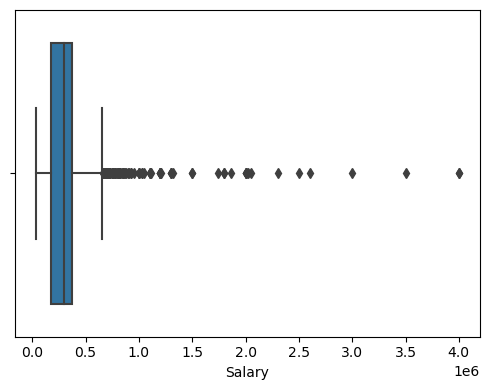

In [25]:
univariate_num("Salary")

The Average of 10percentage: 79.15
The Maximum of 10percentage: 97.76
The Minimum of 10percentage: 43.0
============================== 10percentage ==============================


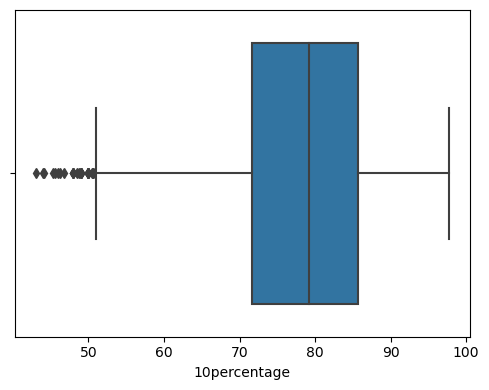

In [26]:
univariate_num('10percentage')

The Average of 12percentage: 74.4
The Maximum of 12percentage: 98.7
The Minimum of 12percentage: 40.0
============================== 12percentage ==============================


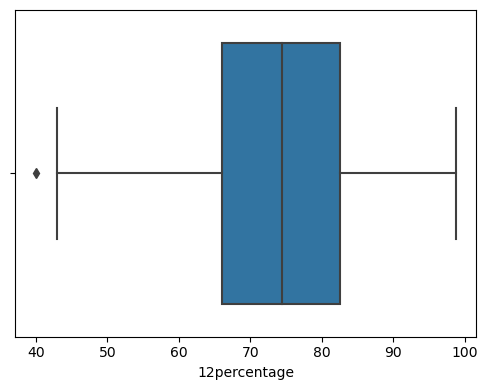

In [27]:
univariate_num('12percentage')

The Average of collegeGPA: 71.8
The Maximum of collegeGPA: 99.93
The Minimum of collegeGPA: 49.07
============================== collegeGPA ==============================


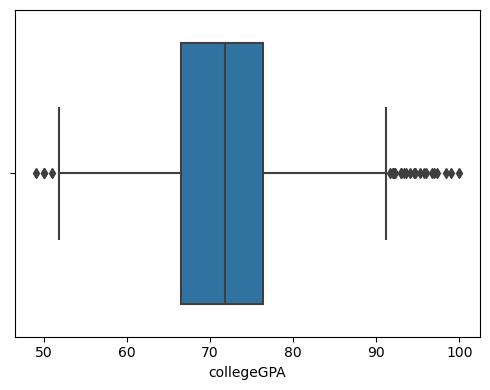

In [28]:
univariate_num('collegeGPA')

The Average of English: 500.0
The Maximum of English: 875
The Minimum of English: 180
============================== English ==============================


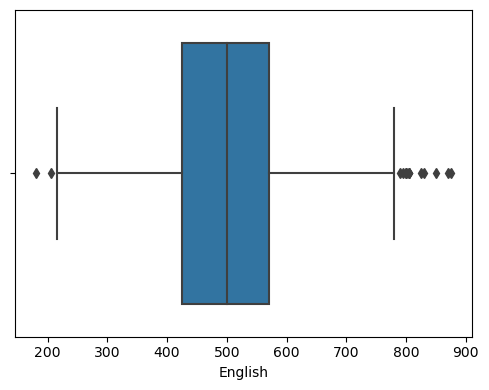

In [29]:
univariate_num('English')

The Average of Logical: 505.0
The Maximum of Logical: 795
The Minimum of Logical: 195
============================== Logical ==============================


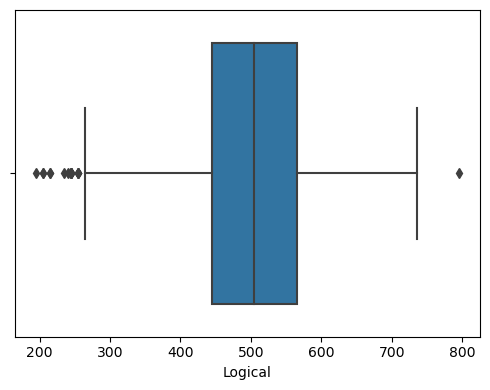

In [30]:
univariate_num('Logical')

The Average of Quant: 515.0
The Maximum of Quant: 900
The Minimum of Quant: 120
============================== Quant ==============================


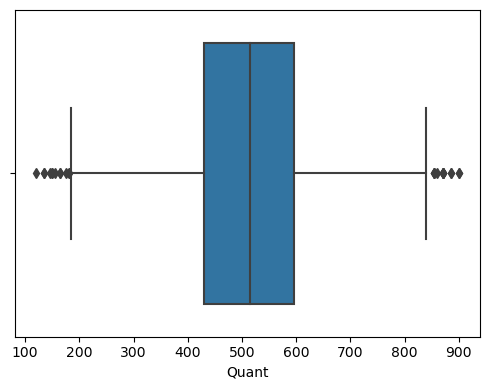

In [31]:
univariate_num('Quant')

The Average of ComputerProgramming: 415.0
The Maximum of ComputerProgramming: 840.0
The Minimum of ComputerProgramming: 105.0
============================== ComputerProgramming ==============================


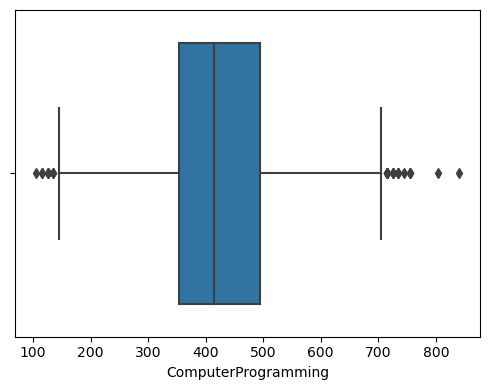

In [32]:
df1['ComputerProgramming']=df1['ComputerProgramming'].replace({-1:df1.ComputerProgramming.mean()})
univariate_num('ComputerProgramming')

The Average of ElectronicsAndSemicon: 95.32841420710355
The Maximum of ElectronicsAndSemicon: 612.0
The Minimum of ElectronicsAndSemicon: 95.32841420710355
============================== ElectronicsAndSemicon ==============================


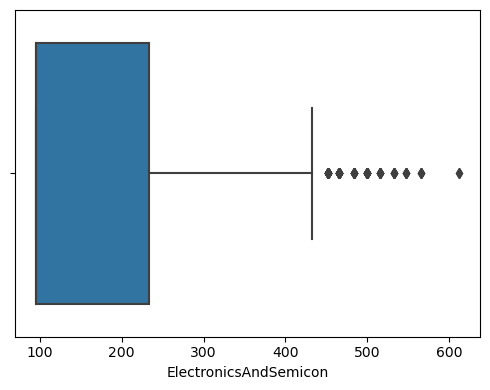

In [33]:
df1['ElectronicsAndSemicon']=df1['ElectronicsAndSemicon'].replace({-1:df1.ElectronicsAndSemicon.mean()})
univariate_num('ElectronicsAndSemicon')

The Average of grad_age: 22.0
The Maximum of grad_age: 34
The Minimum of grad_age: 17
============================== grad_age ==============================


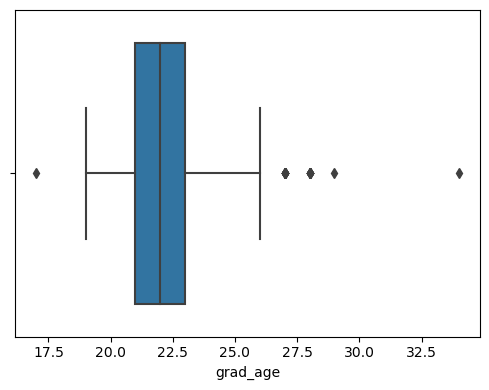

In [34]:
univariate_num('grad_age')

The Average of tenure: 3.0
The Maximum of tenure: 33
The Minimum of tenure: 0
============================== tenure ==============================


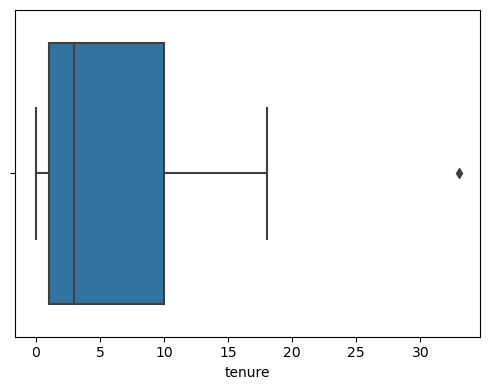

In [35]:
univariate_num('tenure')

# Categorical

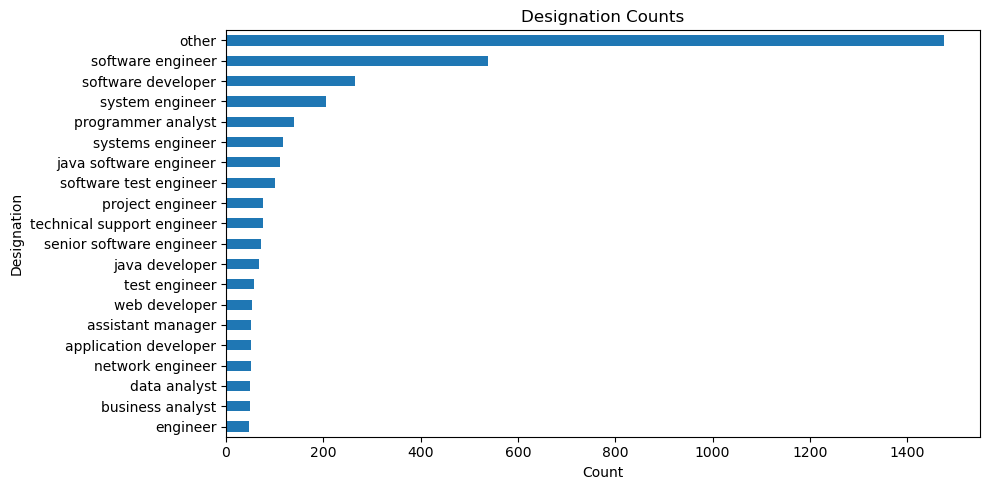

In [36]:
df1['Designation'].value_counts()[:20].sort_values(ascending=True).plot(kind='barh',title='Designation Counts',
                                                                        figsize=(10, 5))

plt.ylabel('Designation')
plt.xlabel('Count')
plt.tight_layout()
plt.show()


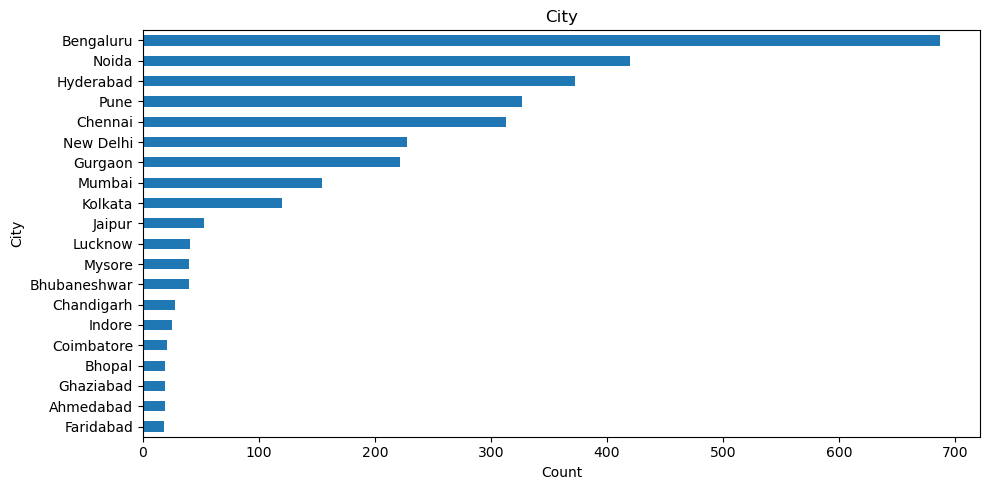

In [37]:
df1['JobCity'].value_counts()[:20].sort_values(ascending=True).plot(kind='barh',title='City',
                                                                        figsize=(10, 5))

plt.ylabel('City')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

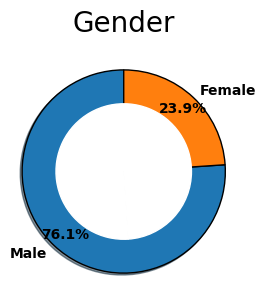

In [38]:
plt.figure(figsize=(3,3))
plt.pie(df1['Gender'].value_counts().tolist(),
labels=df1['Gender'].value_counts().index,
autopct='%1.1f%%',
radius=1.5,
wedgeprops={'edgecolor': 'k'},
textprops={'fontsize': 10, 'fontweight': 'bold'},
shadow=True,
startangle=90,
pctdistance=0.85)
plt.pie(df1['Gender'].value_counts().tolist(),
colors=['white'],
wedgeprops={'edgecolor': 'white'},
radius=1)
plt.title('Gender', pad=40, size=20)
plt.tight_layout()
plt.show()

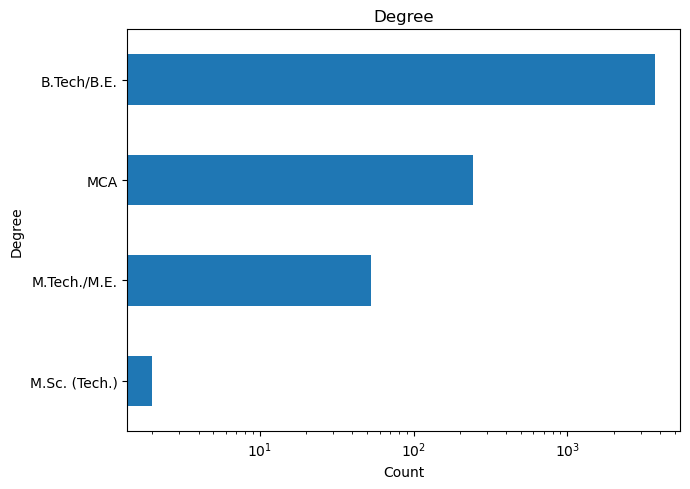

In [39]:
df1['Degree'].value_counts().sort_values(ascending=True).plot(kind='barh',title='Degree',figsize=(7, 5))
plt.ylabel('Degree')
plt.xlabel('Count')
plt.xscale('log')
plt.tight_layout()
plt.show()

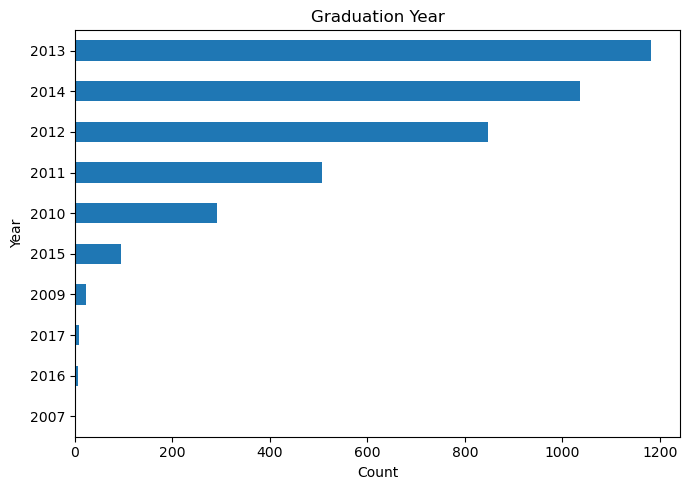

In [40]:
df1['GraduationYear'].value_counts().sort_values(ascending=True).plot(kind='barh',title='Graduation Year',figsize=(7, 5))
plt.ylabel('Year')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

# Bivariate Analysis

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5]),
 [Text(0, 0.5, 'Salary'),
  Text(0, 1.5, 'DOB'),
  Text(0, 2.5, '10percentage'),
  Text(0, 3.5, '12graduation'),
  Text(0, 4.5, '12percentage'),
  Text(0, 5.5, 'collegeGPA'),
  Text(0, 6.5, 'CollegeCityTier'),
  Text(0, 7.5, 'GraduationYear'),
  Text(0, 8.5, 'English'),
  Text(0, 9.5, 'Logical'),
  Text(0, 10.5, 'Quant'),
  Text(0, 11.5, 'Domain'),
  Text(0, 12.5, 'ComputerProgramming'),
  Text(0, 13.5, 'ElectronicsAndSemicon'),
  Text(0, 14.5, 'conscientiousness'),
  Text(0, 15.5, 'agreeableness'),
  Text(0, 16.5, 'extraversion'),
  Text(0, 17.5, 'nueroticism'),
  Text(0, 18.5, 'openess_to_experience'),
  Text(0, 19.5, 'grad_age'),
  Text(0, 20.5, 'tenure')])

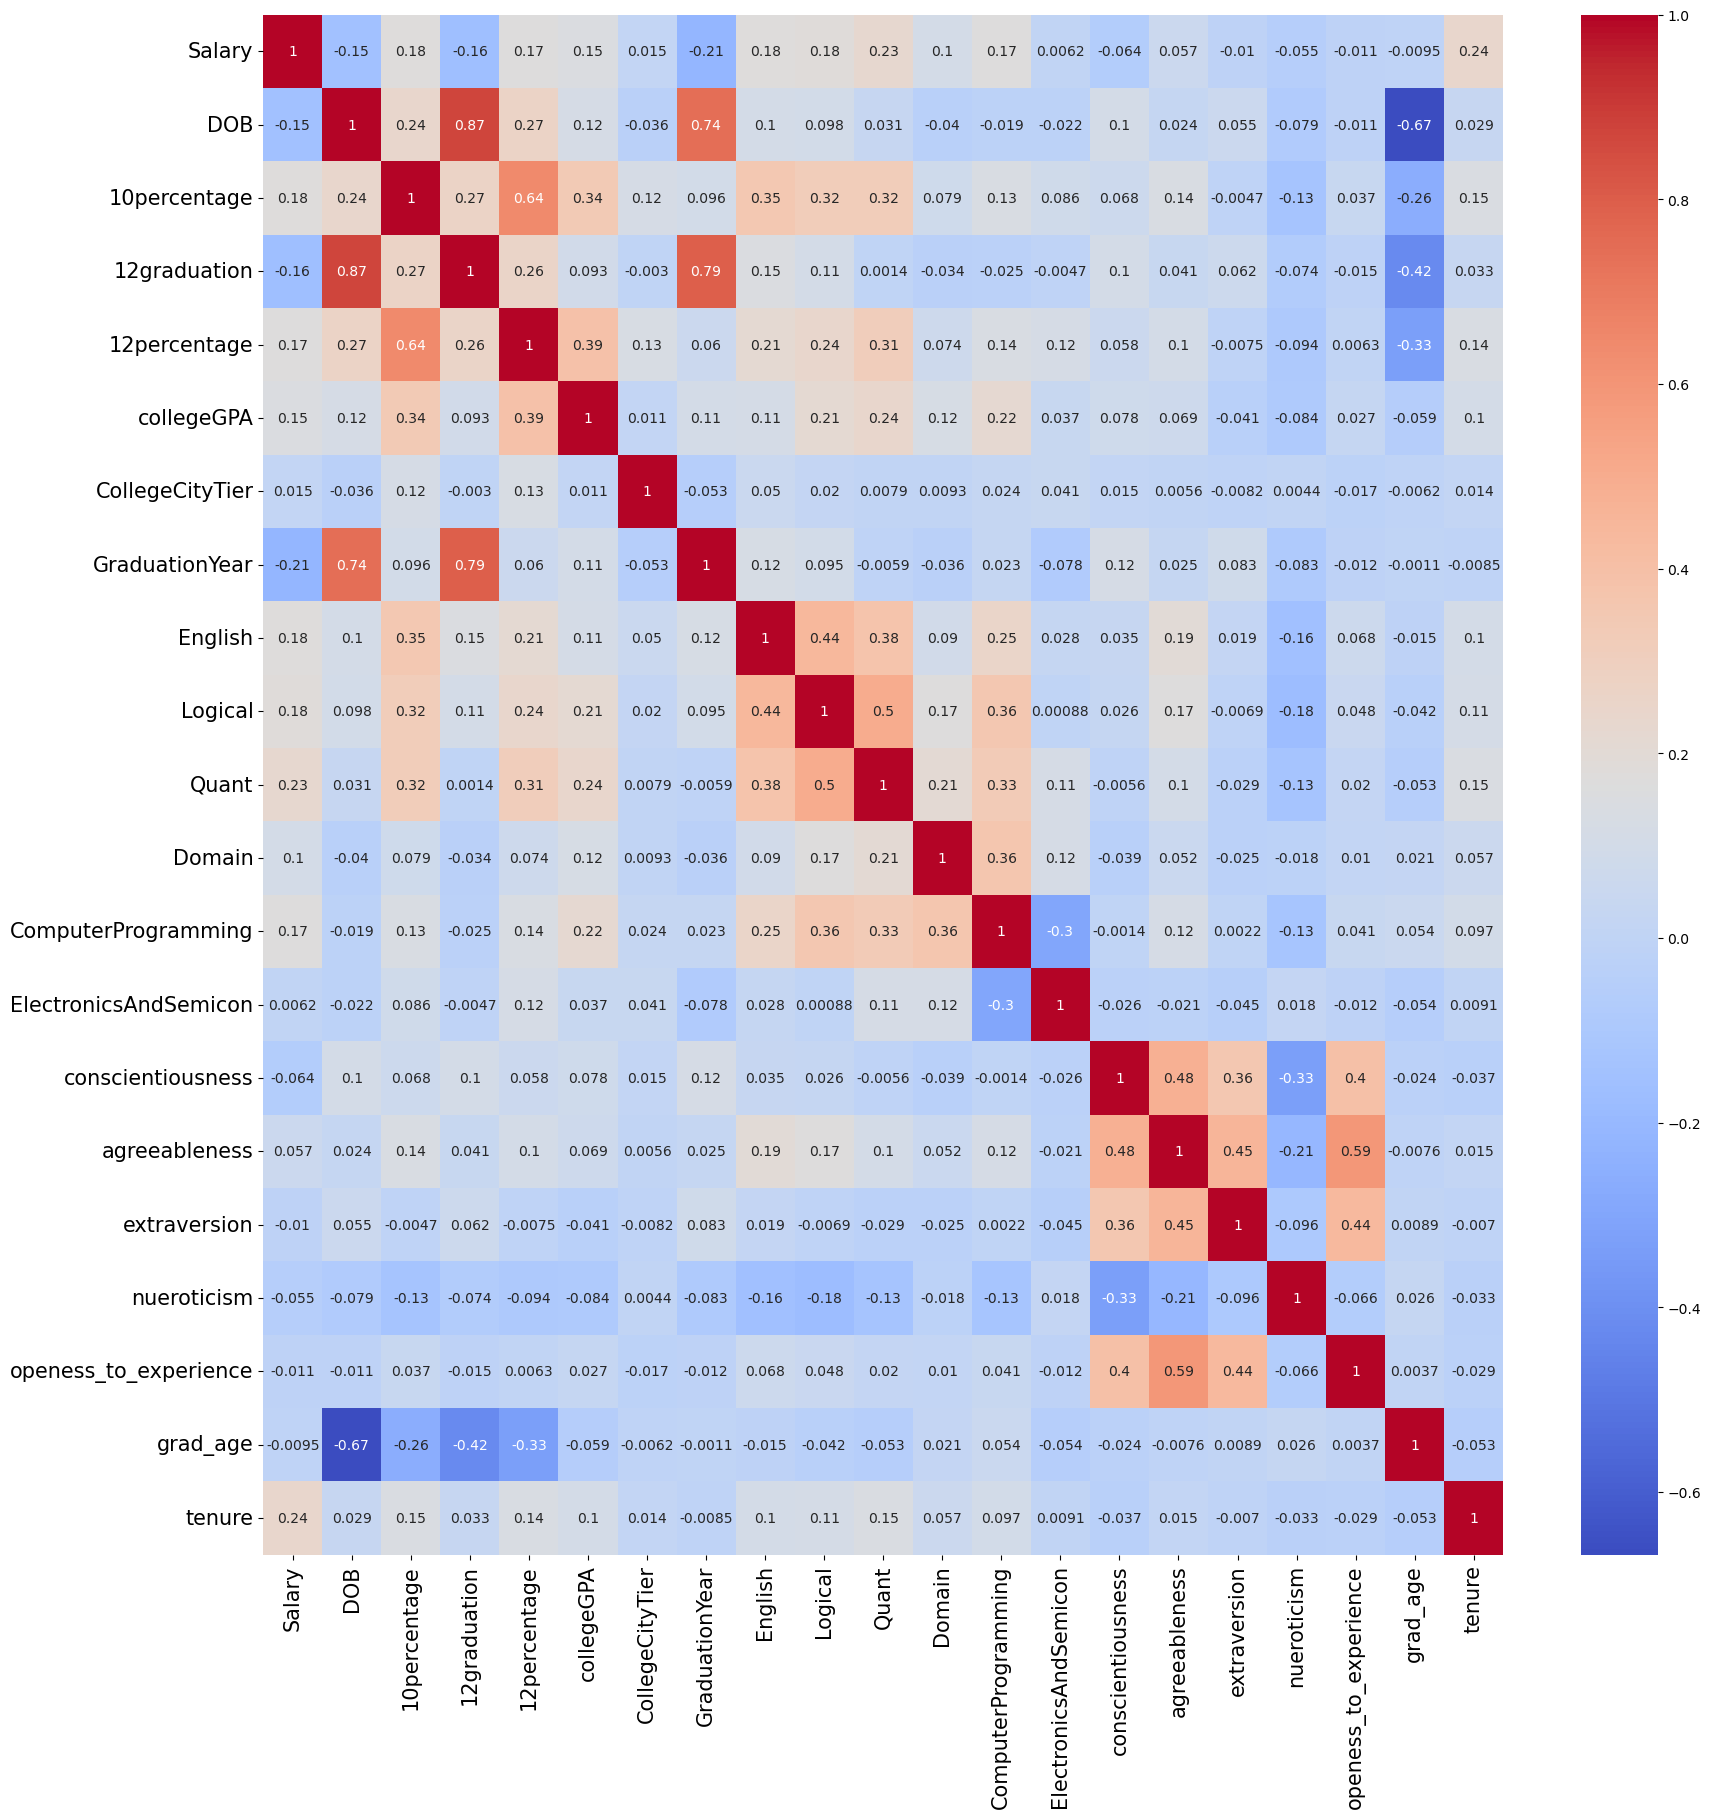

In [41]:
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(),annot=True,cmap='coolwarm')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

<Figure size 1500x500 with 0 Axes>

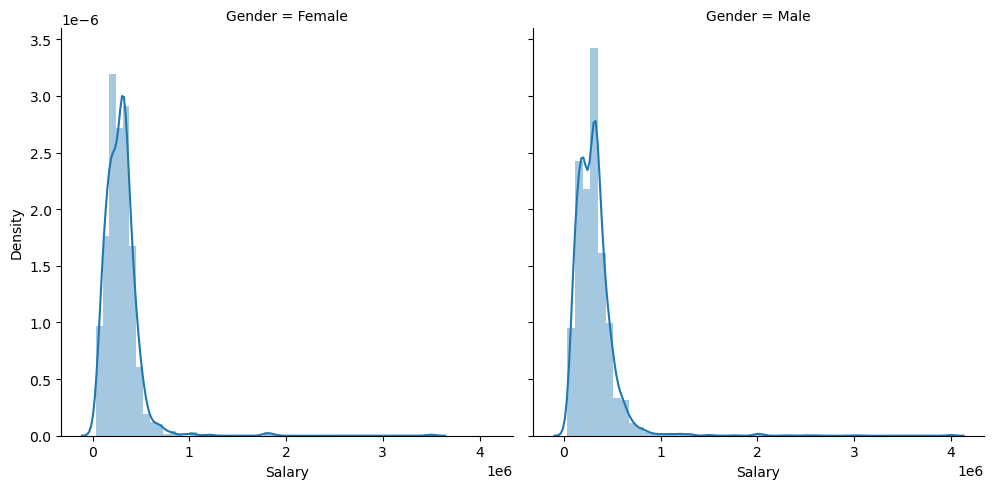

In [42]:
plt.figure(figsize=(15,5))
colors = sns.color_palette('bright',n_colors=2)
sns.FacetGrid(df1, col="Gender", size=5,palette=colors) \
   .map(sns.distplot, "Salary",bins=50) \
   .add_legend()
plt.show()

Text(0.5, 0.98, 'Salary levels by specialization')

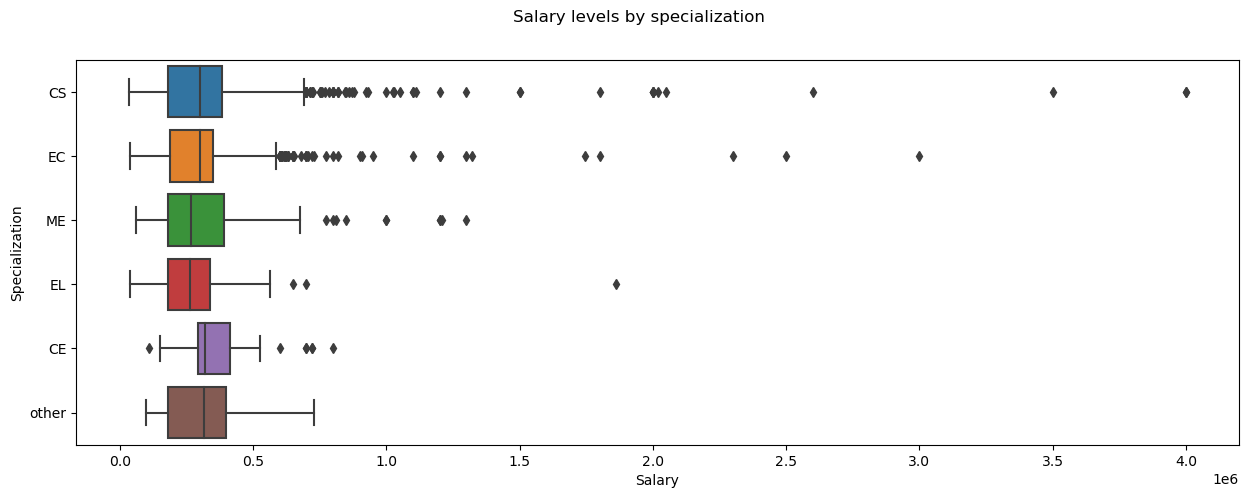

In [43]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Salary',y='Specialization',data=df1)
plt.suptitle('Salary levels by specialization')

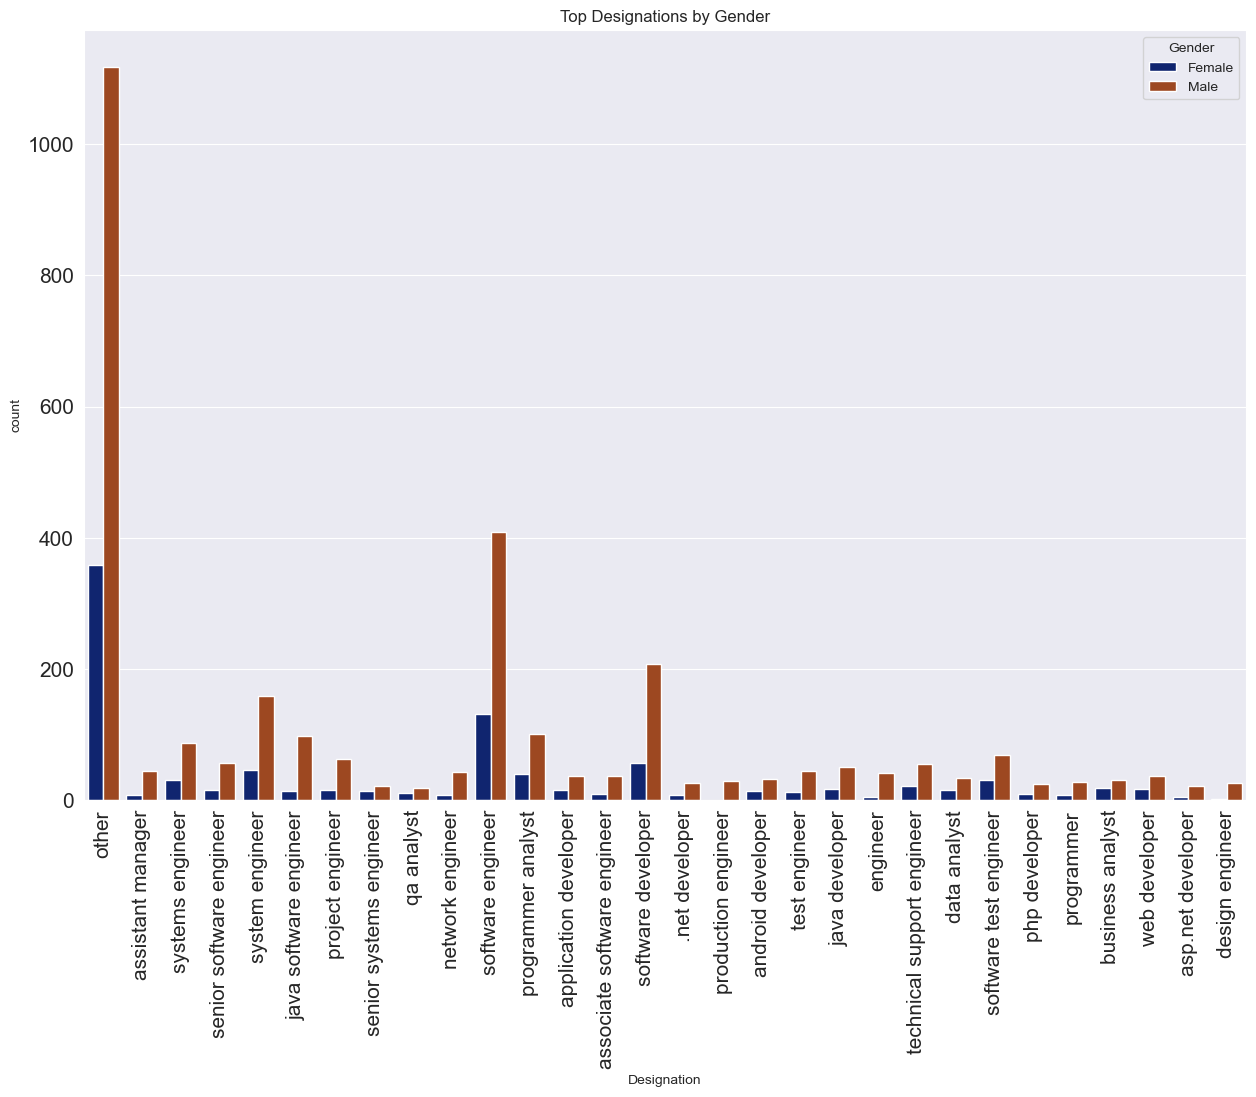

In [44]:
plt.figure(figsize=(15,10))
sns.set_palette("dark")
sns.set_style("darkgrid")
sns.countplot(x='Designation',hue='Gender',data=df1)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.title("Top Designations by Gender")
plt.show()


In [45]:
salary_pay=list(df1.sort_values("Salary",ascending=False)['Designation'].unique())[:20]
huge_pay=df1[df1['Designation'].isin(salary_pay)]
huge_pay.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,12graduation,12percentage,...,Domain,ComputerProgramming,ElectronicsAndSemicon,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,grad_age,tenure
0,420000,2012-06-01,2024-02-23 15:17:18.029159,other,Bengaluru,Female,1990,84.3,2007,95.8,...,0.635979,445.000000,95.328414,0.9737,0.8128,0.5269,1.35490,-0.4455,21,12
1,500000,2013-09-01,2024-02-23 15:17:18.029159,assistant manager,Indore,Male,1989,85.4,2007,85.0,...,0.960603,353.102801,466.000000,-0.7335,0.3789,1.2396,-0.10760,0.8637,23,11
2,325000,2014-06-01,2024-02-23 15:17:18.029159,systems engineer,Chennai,Female,1992,85.0,2010,68.2,...,0.450877,395.000000,95.328414,0.2718,1.7109,0.1637,-0.86820,0.6721,22,10
3,1100000,2011-07-01,2024-02-23 15:17:18.029159,senior software engineer,Gurgaon,Male,1989,85.6,2007,83.6,...,0.974396,615.000000,95.328414,0.0464,0.3448,-0.3440,-0.40780,-0.9194,22,13
4,200000,2014-03-01,2015-03-01 00:00:00.000000,other,Manesar,Male,1991,78.0,2008,76.8,...,0.124502,353.102801,233.000000,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,21,1


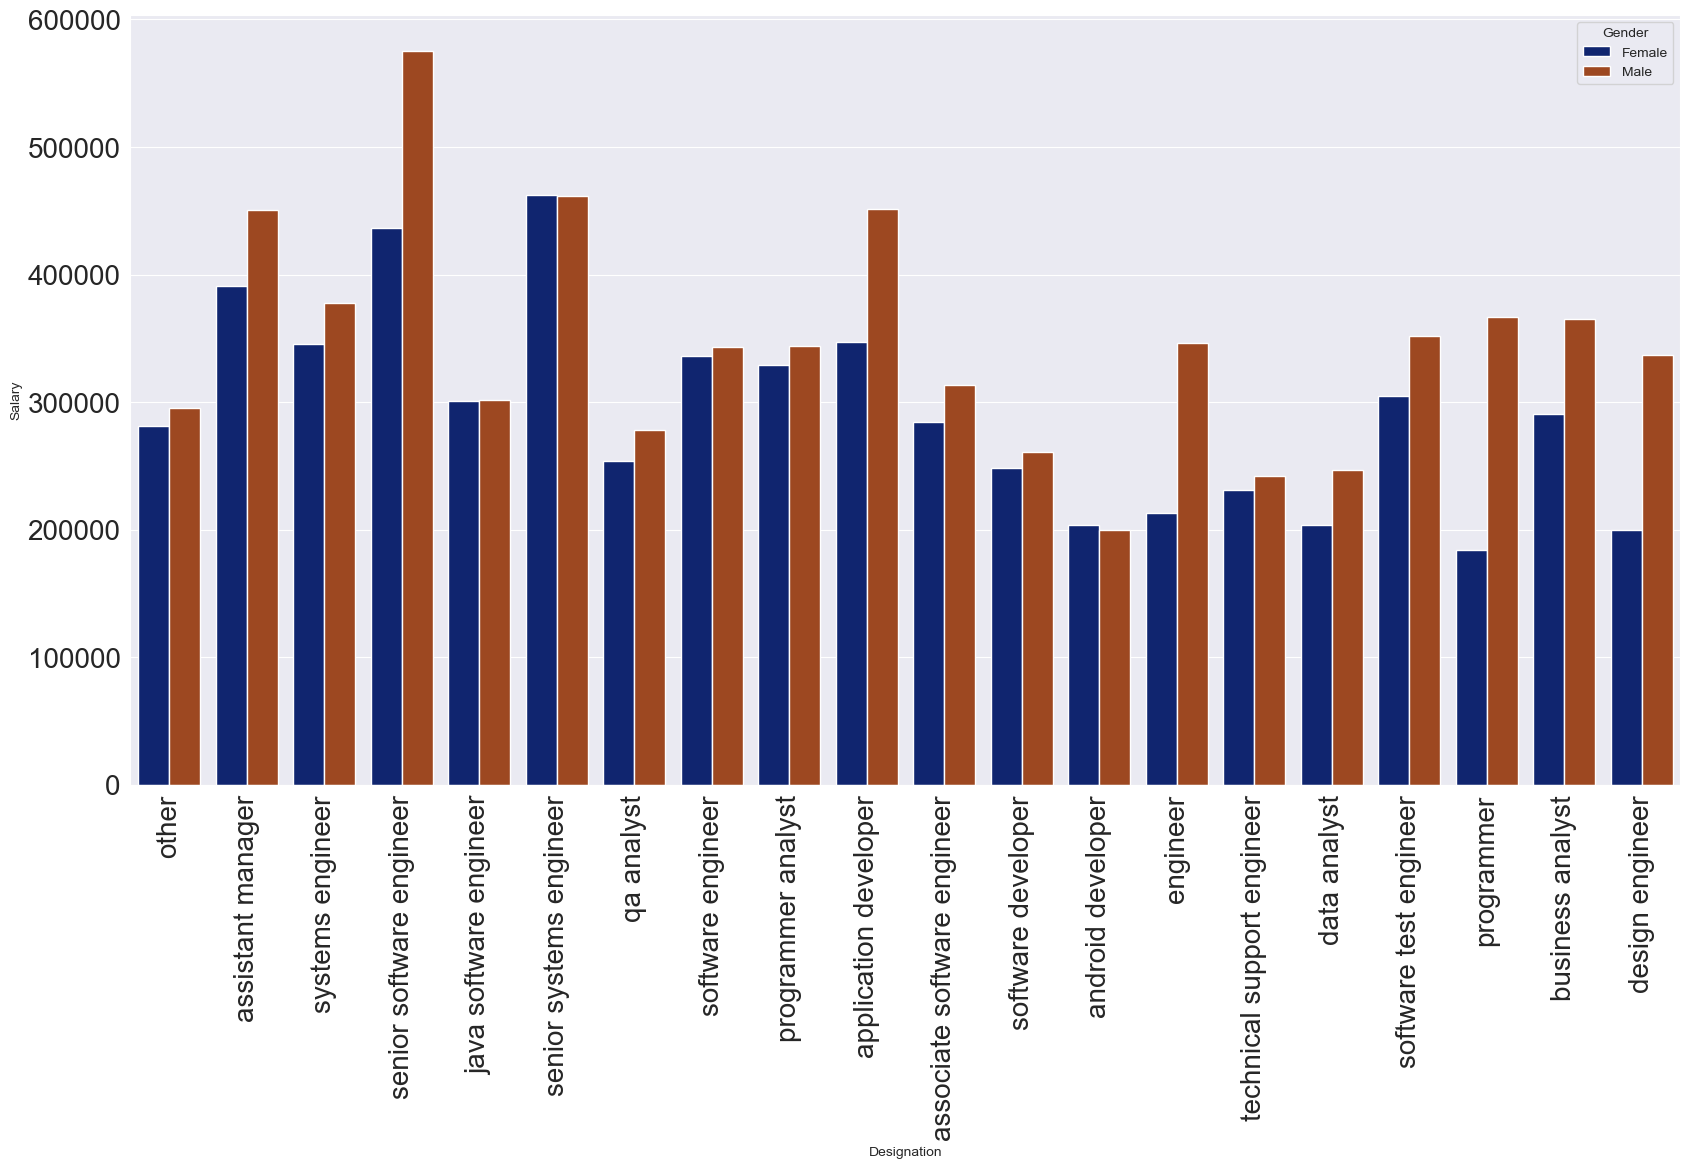

In [46]:
plt.figure(figsize=(20,10))
sns.barplot(x='Designation',y='Salary',hue='Gender',data=huge_pay,ci=None)
plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20)
plt.show()

For Whole dataset
Gender
Female    5.826829
Male      5.774853
Name: tenure, dtype: float64
For High_paying jobs
Gender
Female    5.809822
Male      5.737915
Name: tenure, dtype: float64


<Figure size 2000x500 with 0 Axes>

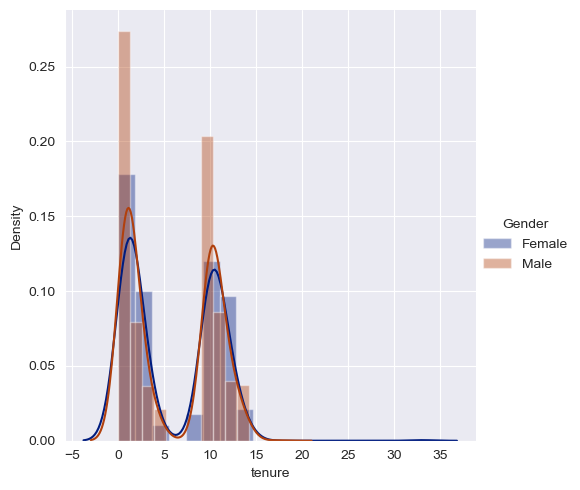

In [47]:
plt.figure(figsize=(20,5))

sns.FacetGrid(huge_pay, hue="Gender",size=5) \
   .map(sns.distplot, "tenure") \
   .add_legend()
print('For Whole dataset')
print(huge_pay.groupby('Gender').tenure.mean())
print('='*30)
print('For High_paying jobs')
print(df1.groupby('Gender').tenure.mean())

<AxesSubplot:xlabel='tenure', ylabel='Salary'>

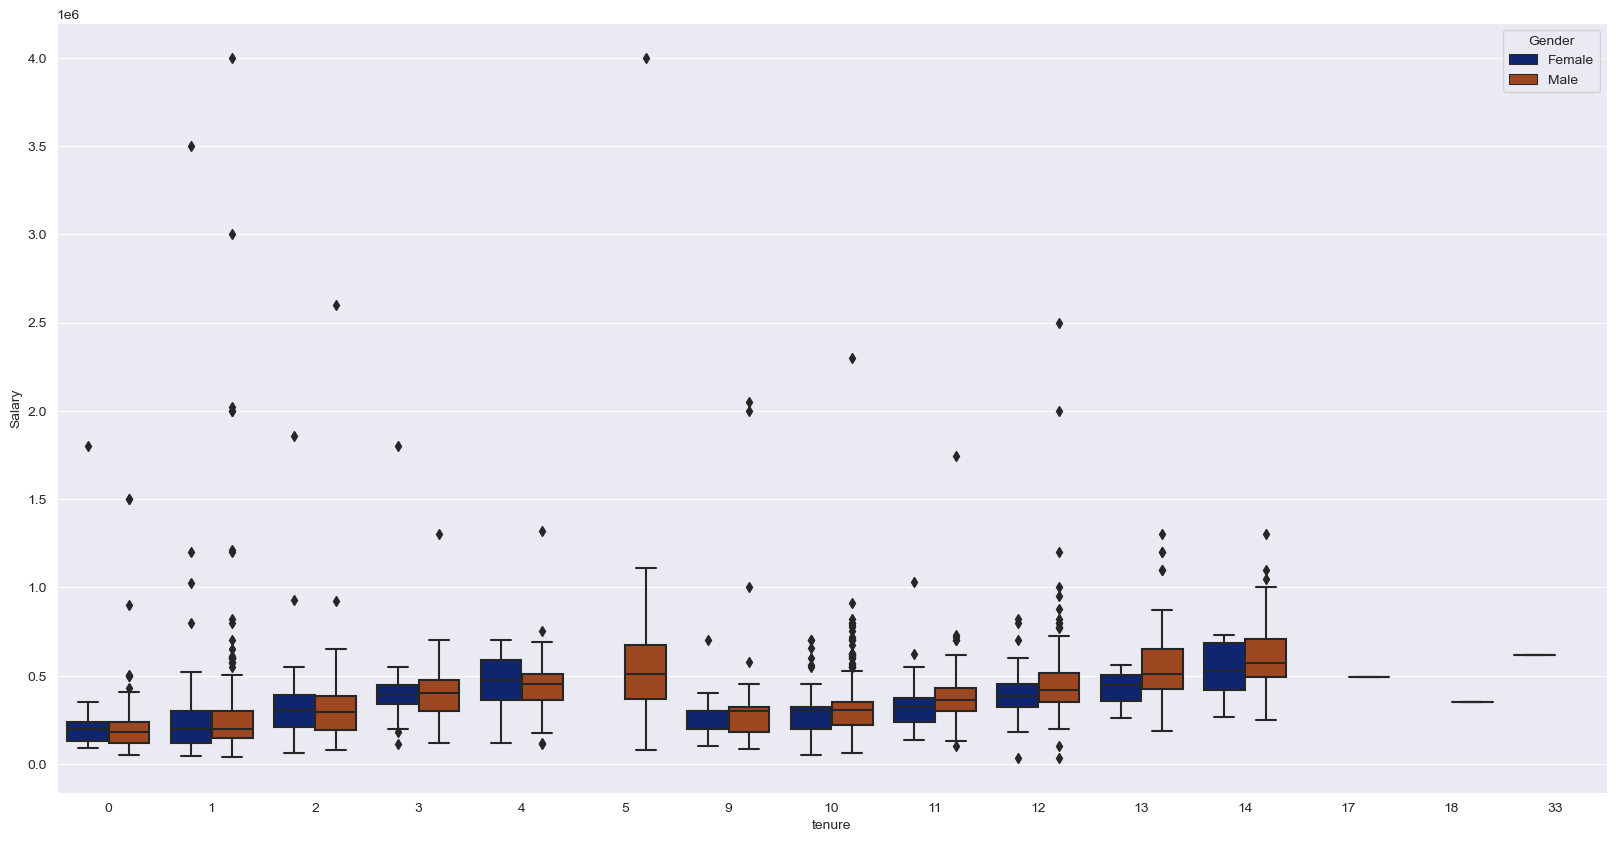

In [48]:
plt.figure(figsize=(20,10))
sns.boxplot(data=huge_pay,x='tenure',y='Salary',hue='Gender')

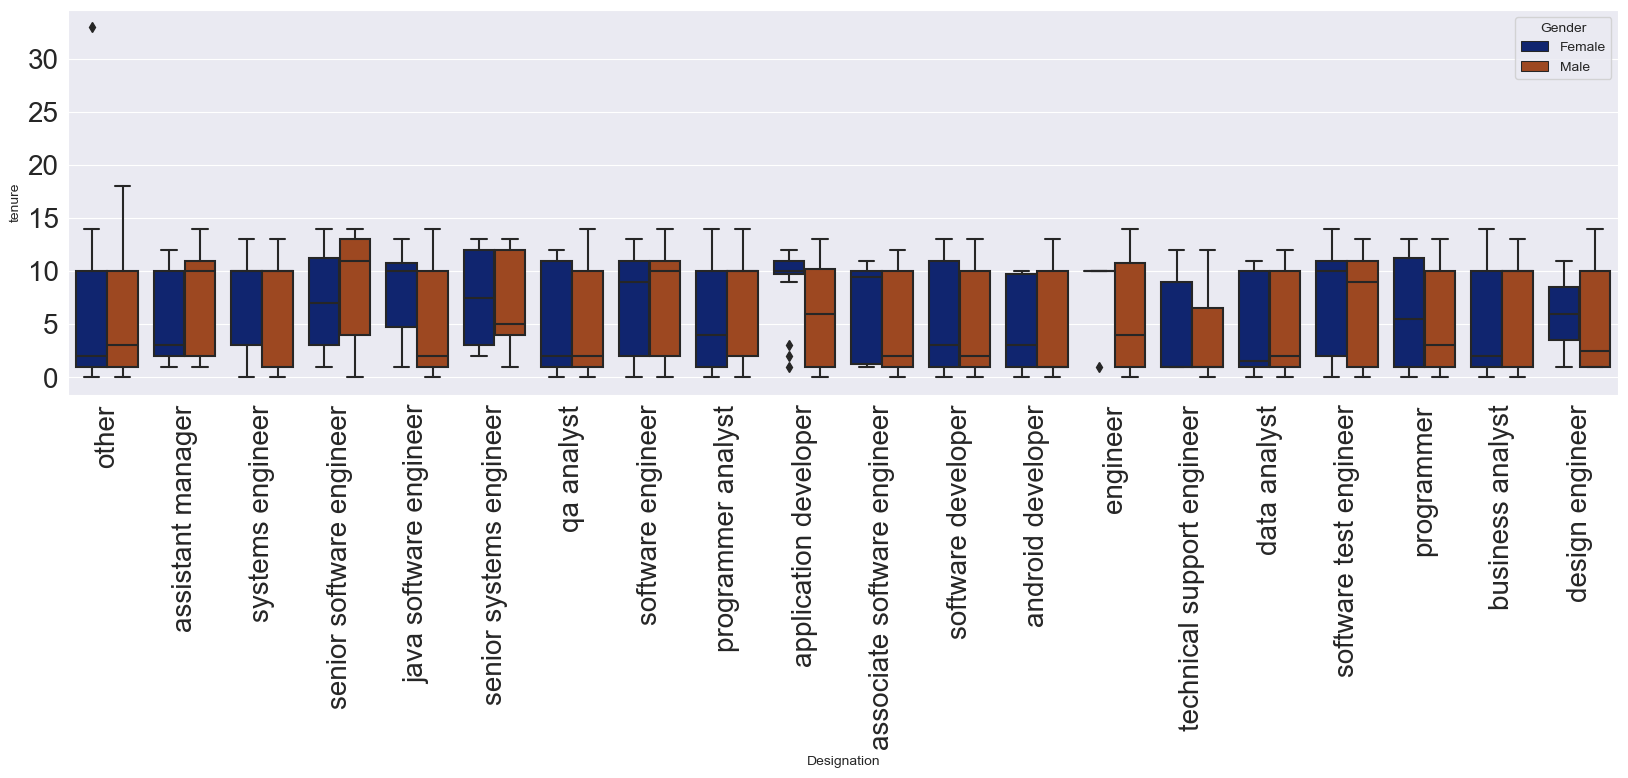

In [49]:
plt.figure(figsize=(20,5))
sns.boxplot(data=huge_pay,x='Designation',y='tenure',hue='Gender')
plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20)
plt.show()

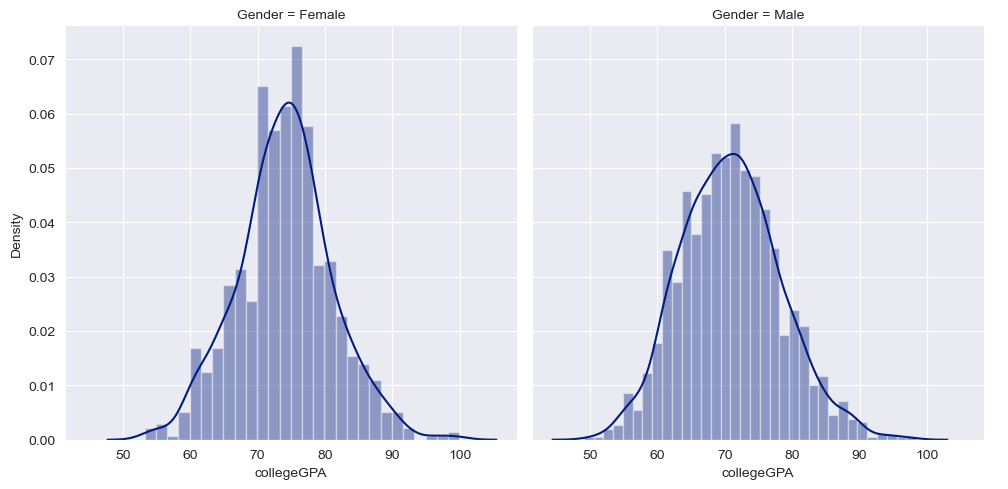

In [50]:
sns.FacetGrid(data=huge_pay,col='Gender',size=5) \
    .map(sns.distplot,'collegeGPA') \
    .add_legend()

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'CS'),
  Text(1, 0, 'EC'),
  Text(2, 0, 'ME'),
  Text(3, 0, 'EL'),
  Text(4, 0, 'CE'),
  Text(5, 0, 'other')])

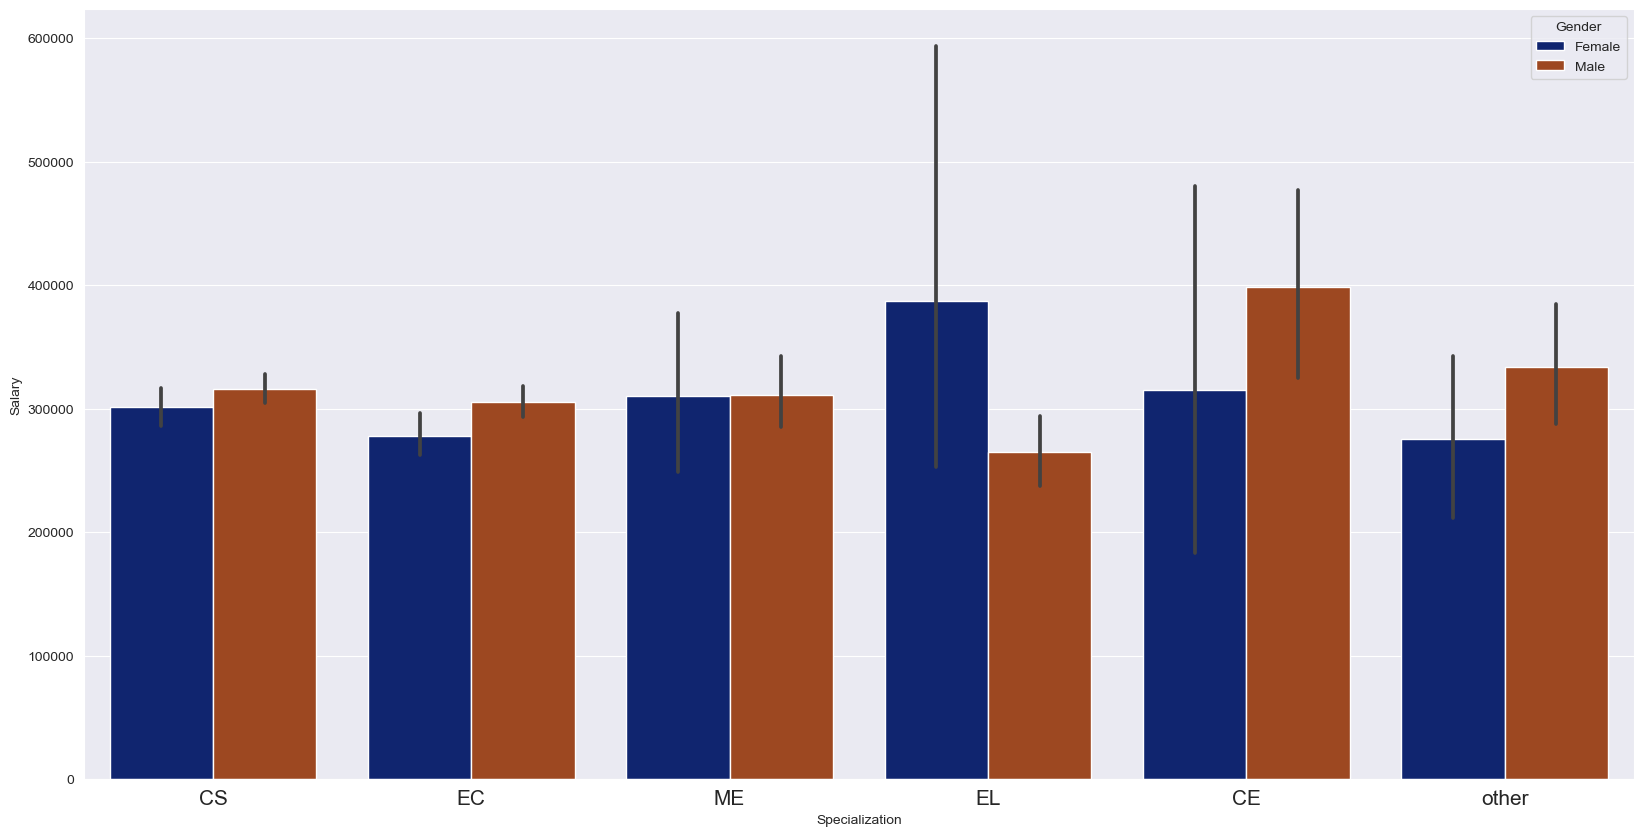

In [51]:
plt.figure(figsize=(20,10))
sns.barplot(data=df1,x='Specialization',y='Salary',hue='Gender')
plt.xticks(fontsize=15)

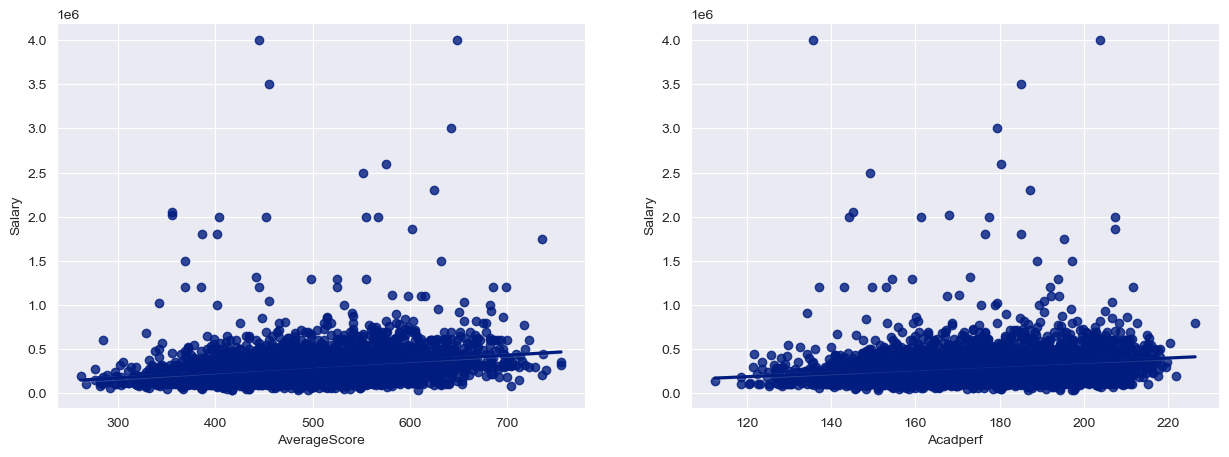

In [52]:
plt.figure(figsize=(15,5))
df1['AverageScore']=(df1['Logical']+df1['Quant']+df1['English'])/3
df1['Acadperf']=df1['10percentage']+df1['12percentage']+df1['collegeGPA']/3
plt.subplot(1,2,1)
sns.regplot(x='AverageScore',y='Salary',data=df1)
plt.subplot(1,2,2)
sns.regplot(x='Acadperf',y='Salary',data=df1)
plt.show()


# Overall Conclusions:
# 1.Most of Amcat Aspirants are male working in IT domain with an experience of around 5years with degree in Btech and specialization in Computer Science/Information Technology from tier-2 college in uttarpradesh with an average salary around 300k.
# 2.Highpaying jobs taken up by amcat aspirants are mostly from 'IT' Domain.
# 3.Software Engineer and Software Developer are the most aimed profession for amcat aspirants.